In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

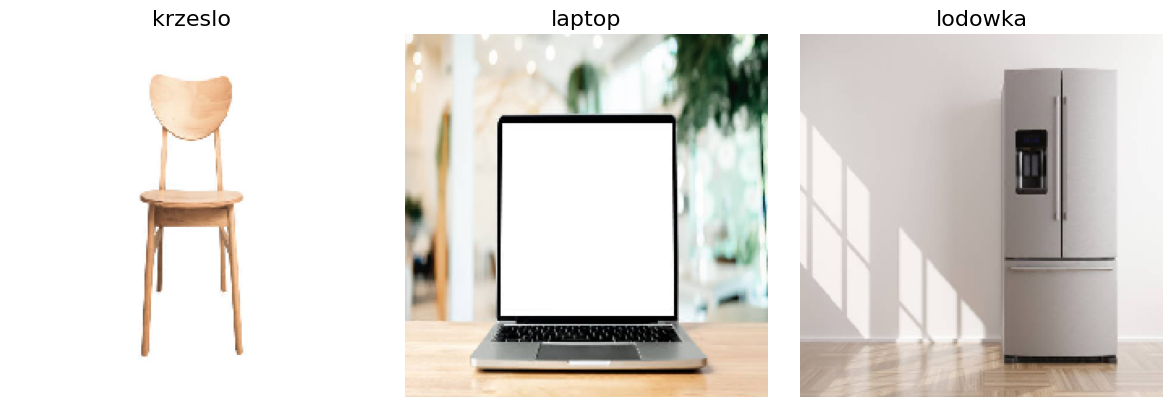

In [14]:
image_titles = ['krzeslo', 'laptop', 'lodowka']

img1 = load_img('krzeslo.jpg', target_size=(224,224))
img2 = load_img('laptop.jpg', target_size=(224,224))
img3 = load_img('lodowka.jpg', target_size=(224,224))

images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

X = preprocess_input(images)

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [21]:
preds = model.predict(X)
best_class = np.argmax(preds, axis=-1)

print('Predicted:', decode_predictions(preds, top=3)[0])
print('Predicted:', decode_predictions(preds, top=3)[1])
print('Predicted:', decode_predictions(preds, top=3)[2])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
Predicted: [('n03544143', 'hourglass', 0.13241099), ('n03141823', 'crutch', 0.10123946), ('n04099969', 'rocking_chair', 0.09138489)]
Predicted: [('n03832673', 'notebook', 0.5645797), ('n03642806', 'laptop', 0.15819606), ('n03180011', 'desktop_computer', 0.051865775)]
Predicted: [('n04070727', 'refrigerator', 0.45870993), ('n04254120', 'soap_dispenser', 0.25468117), ('n03297495', 'espresso_maker', 0.03560561)]


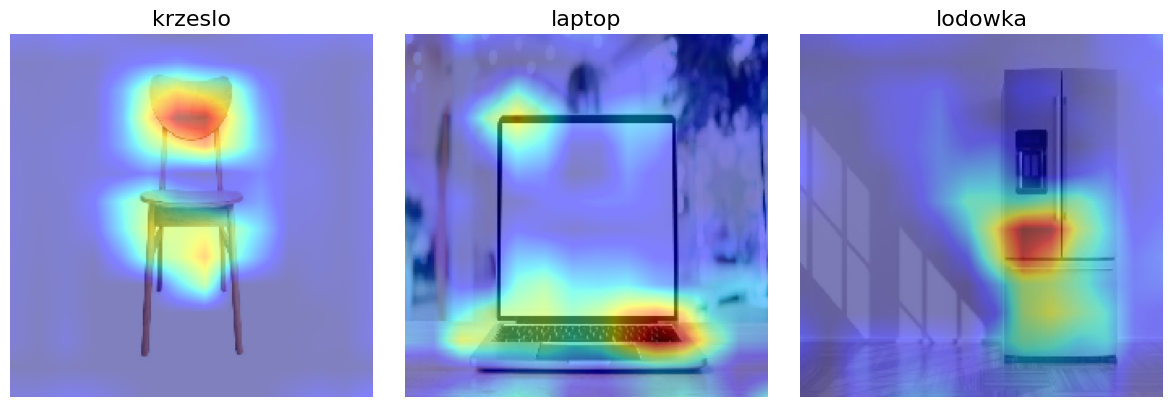

In [24]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import ScoreCAM
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

def visualise_heatmap(map):
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    for i, title in enumerate(image_titles):
        heatmap = np.uint8(cm.jet(map[i])[..., :3] * 255)
        ax[i].set_title(title, fontsize=16)
        ax[i].imshow(images[i])
        ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()
    
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))

gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

cam = gradcam(score, X, penultimate_layer=-1)

visualise_heatmap(cam)

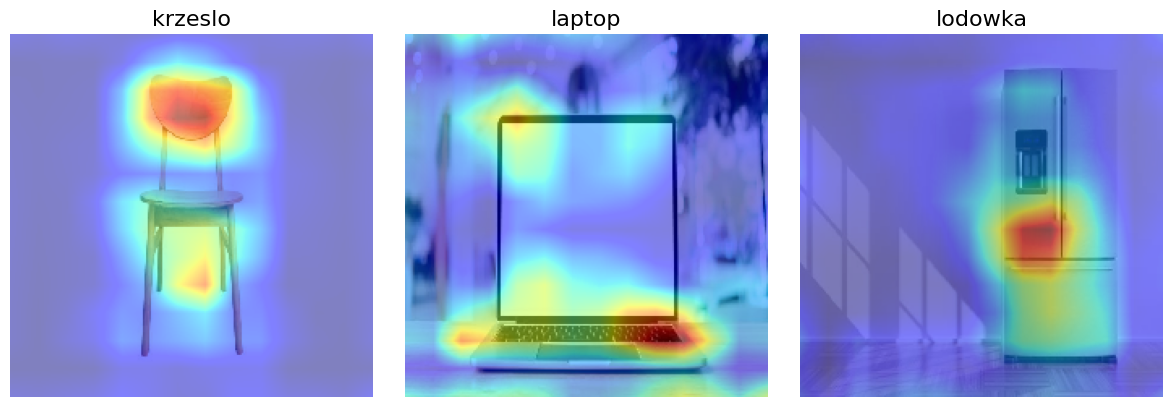

In [26]:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

cam = gradcam(score, X, penultimate_layer=-1)

visualise_heatmap(cam)

48/48 ━━━━━━━━━━━━━━━━━━━━ 300s 6s/step


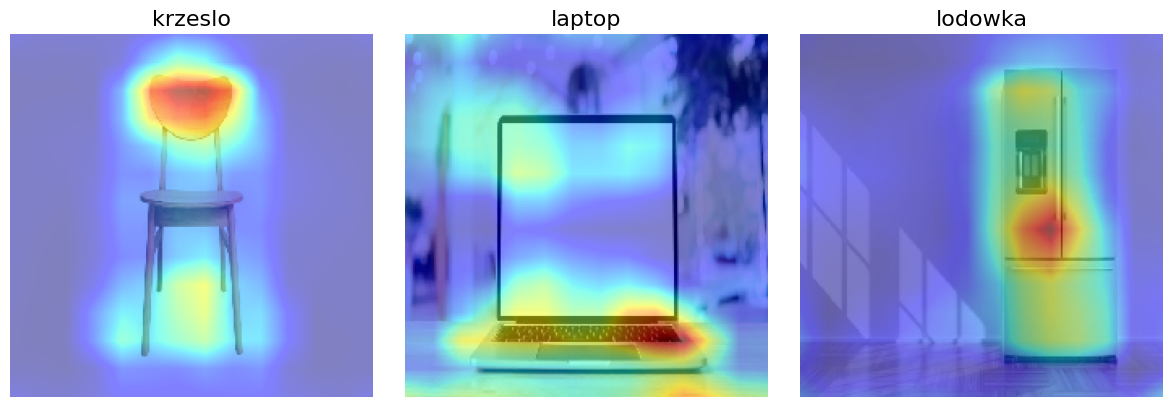

In [27]:
scorecam = ScoreCAM(model)

cam = scorecam(score, X, penultimate_layer=-1)

visualise_heatmap(cam)

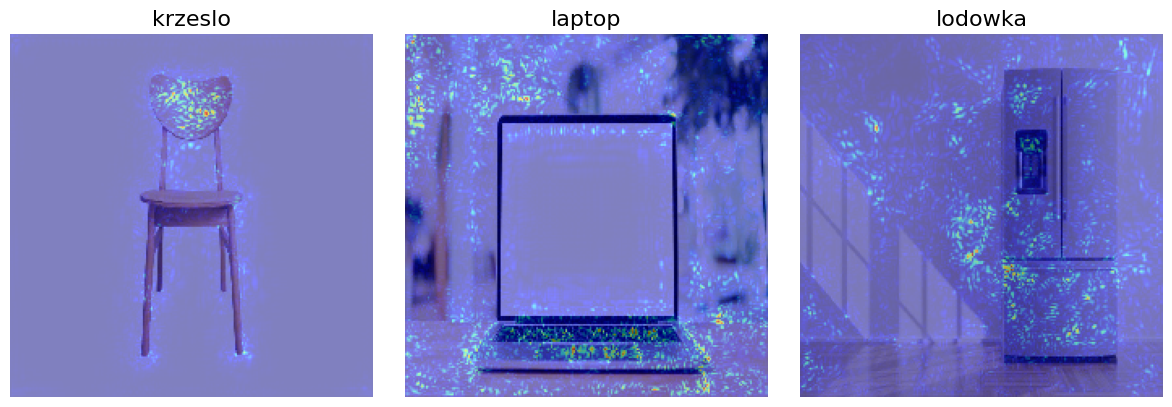

In [28]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

saliency_map = saliency(score, X)

visualise_heatmap(saliency_map)

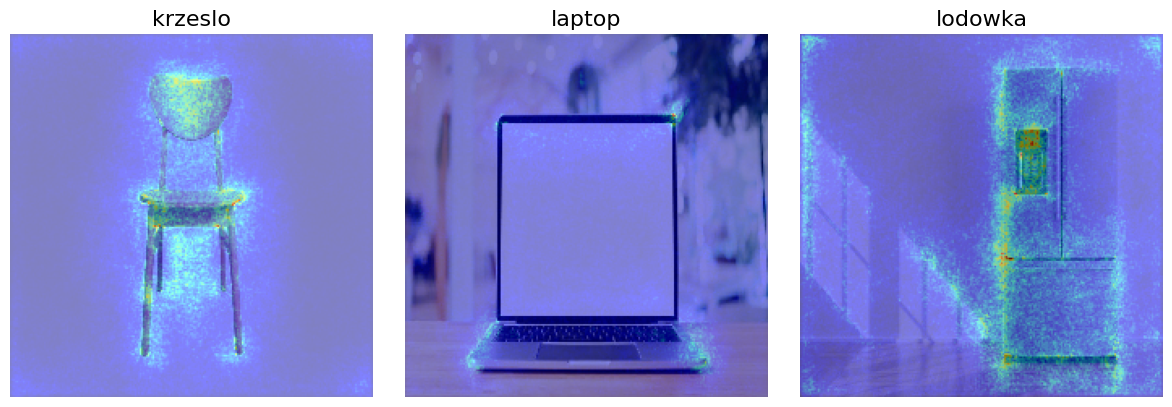

In [29]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

visualise_heatmap(saliency_map)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


C:\Users\Lukas\AppData\Local\Temp\ipykernel_9956\1788450320.py:20: RuntimeWarning: invalid value encountered in divide
  channel_image /= np.max(channel_image)


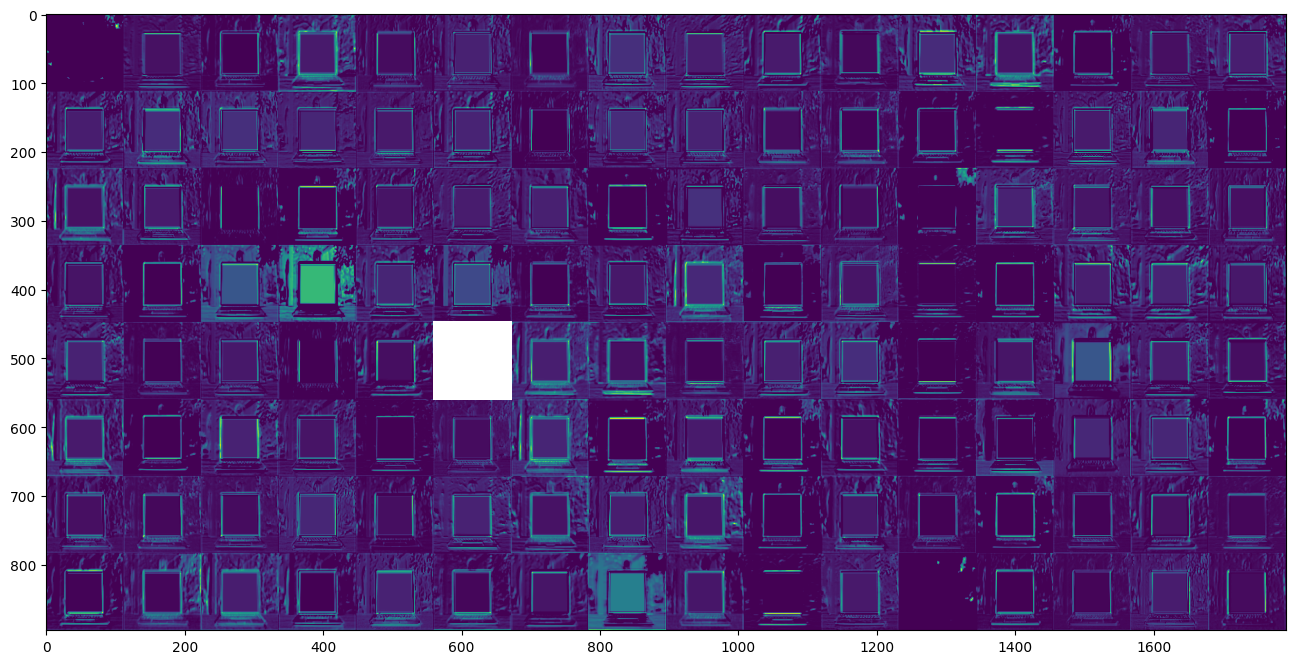

In [53]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = X[1].reshape((1, 224, 224, 3))
activations = activation_model.predict(X_reshaped)
 
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block2_conv1':
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')